### Lets call important library


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#### call a Csv/Excel file to load as a DataFrame for performing the tasks


In [41]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Visualization of Our data in a scatter plot


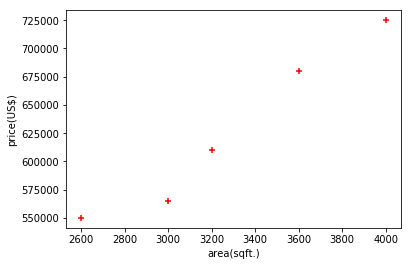

In [42]:
%matplotlib inline
plt.xlabel('area(sqft.)')
plt.ylabel('price(US$)')
plt.scatter(df.area , df.price , color = 'red',marker = '+')

### lets Create a simple Linear Regression using sklearn.linear_model

In [43]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)
#In  fit 1st argument is the dataframe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### prediction of the untrained data

In [44]:
model.predict([[3300]])

array([628715.75342466])

In [45]:
model.predict([[5000]])

array([859554.79452055])

In [52]:
#it behaves like slope and intersept y=mx+b  here m  is coefficient and b is intercept
m=model.coef_
b = model.intercept_
x = 3300
y = m*x + b


### Lets load a list/dataframe that only contain the area in it

In [53]:
d = pd.read_csv('areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


#### Now we are going to predict data in bulk using the above dataframe

In [55]:
# in this you can pass d as a new dataframe for which you want to find homeprices in bulk
p= reg.predict(d)
d['prices'] = p

In [56]:
d.head(2)


,area,prices
0,1000,316404.109589
1,1500,384297.945205


#### Let's draw the line plot near our scatter points

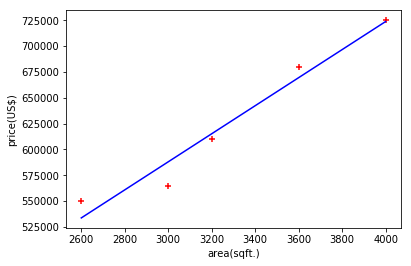

In [57]:
%matplotlib inline
plt.xlabel('area(sqft.)')
plt.ylabel('price(US$)')
plt.scatter(df.area , df.price , color = 'red',marker = '+')
plt.plot(df.area,reg.predict(df[['area']]),color = 'blue')

## Now we are going to save our trained model for later use using pickle and joblib


## Model persistence

After training a scikit-learn model, it is desirable to have a way to **persist** the model for future use without having to retrain.


## Pickle
is the standard way of **serializing** objects in Python. You can use the **pickle operation to serialize your machine learning algorithms** and save the serialized format to a file. Later you can **load this file to deserialize your model** and use it to make new predictions

In [51]:
import pickle

In [30]:
with open('model_pickle','wb') as f:
    pickle.dump(model , f)

In [31]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [33]:
mp.predict([[5000]])

array([859554.79452055])

# joblib
In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [34]:
from sklearn.externals import joblib

In [35]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [36]:
mj = joblib.load('model_joblib')

In [37]:
mj.predict([[5000]])

array([859554.79452055])

In [38]:
mj.coef_

array([135.78767123])

In [39]:
mj.intercept_

180616.43835616432